# Diabetes Prediction Using Macine Learning 
## In this project we are going to use Support Vector Machine Algoritham



### SVM is part of regression model in supervised learning 
###  SVM constructs a hyperplane in multidimensional space to separate different classes.
### The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
#### We can refer the below image 
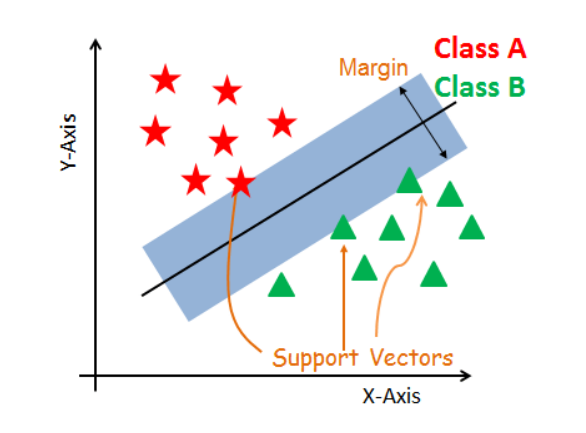

### Support Vectors:
#### Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

### Hyperplane:
#### A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Margin:
#### A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

#### Let's get started with the project by importing the dependencies





In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import accuracy_score

### About the Data:
#### Data contain information about the female diabetes and non-diabetes patient
#### columns:
##### Pregnancies: number of Pregnancies
##### Glucose: Glucose Level of Female
##### BloodPressure, SkinThickness, Insulin, Age: BloodPressure, SkinThickness, Insulin, Age of that female
##### BMI: BMI is Body Mass Index
##### DiabetesPedigreeFunction: DiabetesPedigreeFunction is number which represent some dibetic value in body
##### Outcome: Outcome is label where 1 represent patient is diabetic and 0 represent patient is nondiabetic

#### Data Collection and Analysis



In [21]:
### loading the data 

Data=pd.read_csv("C:\diabetes.csv")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
### head function show the first 5 row as a result 

Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Suppose if you dont know the some funtion in python you just have to write that function and give question mark(?)  as below 
### pd.read_csv?
#### This will open help window with loads of information about the function 

In [5]:
### Getting the columns of the function 

Data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
### number of rows and columns in this dataset

Data.shape

(768, 9)

In [7]:
### getting the statistical measures of the data

Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
### getting the count of the diabetic women

Data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 0>> non diabetic
#### 1>> diabetic

In [9]:
### getting the mean value for patient 

Data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### From the above mesurments we can say that the Glucose level is more in diabetic patient also the insuline level of the diabetic patient is high
#### Skin Thickness is less on non diabetic patient

In [10]:
### seprating data and labels to create features 

X=Data.drop(columns="Outcome", axis=1)
Y=Data["Outcome"]

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Data Standardization

### what is Data Standardization?
##### Data standardization is the process of bringing data into a uniform format that allows analysts and others to research, analyze, and utilize the data.
#### In simple words when features of the input data set have large diffrences between their range in such case we standardize the data for better understanding of the machine.


In [13]:
### importing the dependanceis

scaler = StandardScaler() 

In [14]:
### fitting the data 

scaler.fit(X)

StandardScaler()

In [15]:
### Transforming the data 

Standardized_Data=scaler.transform(X)

In [16]:
print(Standardized_Data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X=Standardized_Data

### we can fit and standerdize the data just into one function
### insted of doing two steps as:
### >>scaler.fit(X)
### >>Standardized_Data=scaler.transform(X)
### we can use
### >>Standardized_Data=scaler.fit_transform(X)

# Train Test Split

In [18]:
### spliting the data 

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

#### In the above code we are spliting the data into two arrays, the data of X that we have standerdized will get split into X_train and X_test and corresponding of that data will split into Y_train and Y_test
#### we are going to train the model using the train data and test its accuracy using test data 
### Attribute :
#### test_size : in this attribute we specify the ratio of spliting data. here we have mention 0.2 that means 20% of the data is going in test arrays(we can change the ratio as per our prefrence)
#### stratify: stratify attribute makes sure that data is spliting into the equal format. in this case if we dont mention anything more amount of diabetic cases can split into the train set or vise varsa
#### random_state : Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. 
#### If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.


In [19]:
print(X.shape, X_train.shape, X_test.shape )

(768, 8) (614, 8) (154, 8)


# Training the model 

In [22]:
classifier= svm.SVC(kernel='linear')

In [24]:
### training the support vector machine classifier

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

### Accuracy score



In [27]:
### Accuracy score on the training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [28]:
print("Accuracy score of the training data: ",training_data_accuracy)

Accuracy score of the training data:  0.7866449511400652


In [29]:
### Accuracy score on the test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [30]:
print("Accuracy score of the training data: ",test_data_accuracy)

Accuracy score of the training data:  0.7727272727272727


# Making a Predictive system 
#### here i am taking input from current dataset only

In [34]:
### taking not diabetic set 
input_data=(4,110,92,0,0,37.6,0.191,30)
### changing the input data to the numpy array 
input_data_as_array= np.asarray(input_data)
### reshaping the array as we are uning only one data point 
Final_array=input_data_as_array.reshape(1,-1)

In [35]:
### standerdize the input data

std=scaler.transform(Final_array)
print(std)

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]


In [36]:
prediction=classifier.predict(std)
print(prediction)

[0]


In [37]:
if prediction==[0]:
    print("the person is not diabetic")
else:
    print("the person is diabetic")

the person is not diabetic


In [48]:
### lets try another example
### taking diabetic set 
input_data=(2,197,70,45,543,30.5,0.158,53)
input_data_as_array=np.asarray(input_data)
final_array=input_data_as_array.reshape(1,-1)

In [49]:
std=scaler.transform(final_array)
print(std)

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]


In [50]:
prediction= classifier.predict(std)
print(prediction)

[1]


In [51]:
if prediction==[0]:
    print("the person is not diabetic")
else:
    print("the person is diabetic")

the person is diabetic


### As we can see the model is working fine and making correct prediction 
### we have achived the purpose of this project 